In [1]:
%pylab inline
from octopus import shapes, orbit_cm
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading simulation data from N-body simulations
dm_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
dm_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
dm_ids_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

dm_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
dm_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
dm_ids_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [3]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    return xyz[index_mw], vxyz[index_mw]

In [4]:
mw_pos_i, mw_vel_i = mw_particles(dm_pos_i, dm_vel_i, dm_ids_i, 1000000)
mw_pos_f, mw_vel_f = mw_particles(dm_pos_f, dm_vel_f, dm_ids_f, 1000000)

In [5]:
xcm_i, ycm_i, zcm_i, vx_cmi, vy_cmi, vz_cmi = orbit_cm.CM(mw_pos_i, mw_vel_i)
xcm_f, ycm_f, zcm_f, vx_cmf, vy_cmf, vz_cmf = orbit_cm.CM(mw_pos_f, mw_vel_f)

In [6]:
print xcm_i, ycm_i, zcm_i
print xcm_f, ycm_f, zcm_f

0.0326767973748 -0.0160168181304 -0.025037442445
3.14213492468 33.1085245965 -10.5106429199


In [21]:
N_r = 200
q_shell_i = np.zeros(N_r)
s_shell_i = np.zeros(N_r)
q_vol_i = np.zeros(N_r)
s_vol_i = np.zeros(N_r)

q_shell_f = np.zeros(N_r)
s_shell_f = np.zeros(N_r)
q_vol_f = np.zeros(N_r)
s_vol_f = np.zeros(N_r)

r = np.linspace(3, 400, N_r)


In [22]:
for i in range(len(r)):
    q_shell_i[i], s_shell_i[i] = shapes.iterate_shell(mw_pos_i[:,0]-xcm_i, mw_pos_i[:,1]-ycm_i, mw_pos_i[:,2]-zcm_i, r[i], 1.0, 1E-2)
    q_shell_f[i], s_shell_f[i] = shapes.iterate_shell(mw_pos_f[:,0]-xcm_f, mw_pos_f[:,1]-ycm_f, mw_pos_f[:,2]-zcm_f, r[i], 1.0, 1E-2)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [34]:
for i in range(len(r)):
    q_vol_i[i], s_vol_i[i] = shapes.iterate_volume(mw_pos_i[:,0]-xcm_i, mw_pos_i[:,1]-ycm_i, mw_pos_i[:,2]-zcm_i, r[i], 1E-1)
    q_vol_f[i], s_vol_f[i] = shapes.iterate_volume(mw_pos_f[:,0]-xcm_f, mw_pos_f[:,1]-ycm_f, mw_pos_f[:,2]-zcm_f, r[i], 1E-1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


(0.8, 1.2)

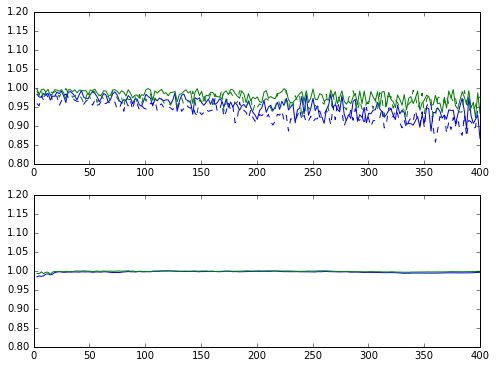

In [36]:
figure=(figsize(8,6))
subplot(2, 1, 1)
plot(r, q_shell_i)
plot(r, s_shell_i)
plot(r, q_shell_f, ls='--', c='b')
plot(r, s_shell_f, ls='--', c='g')
plt.ylim(0.8, 1.2)

subplot(2, 1, 2)
plot(r, q_vol_i)
plot(r, s_vol_i)
#plot(r, q_vol_f, ls='--', c='b')
#plot(r, s_vol_f, ls='--', c='g')
plt.ylim(0.8, 1.2)